In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
df["Age"].isnull().sum()

177

In [7]:
df['Age'].fillna(df['Age'].median(), inplace=True) 

In [8]:
df["Age"].isnull().sum()

0

In [9]:
df["Embarked"].isna().sum()

2

In [10]:
df["Embarked"].fillna(df["Embarked"].mode()[0] , inplace = True)

In [11]:
df["Embarked"].isna().sum()

0

In [12]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex']) 

In [13]:
# One-hot encoding for Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [14]:
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [15]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,False,True
887,1,1,0,19.0,0,0,30.0000,False,True
888,0,3,0,28.0,1,2,23.4500,False,True
889,1,1,1,26.0,0,0,30.0000,False,False


In [16]:
df["Embarked_Q"] = df["Embarked_Q"].astype(int)
df["Embarked_S"] = df["Embarked_S"].astype(int)


In [17]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,28.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


In [18]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [19]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.25)

In [20]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

C:\Users\rahul\OneDrive\Desktop\h.python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
461,3,1,34.0,0,0,8.0500,0,1
231,3,1,29.0,0,0,7.7750,0,1
728,2,1,25.0,1,0,26.0000,0,1
499,3,1,24.0,0,0,7.7958,0,1
29,3,1,28.0,0,0,7.8958,0,1
...,...,...,...,...,...,...,...,...
495,3,1,28.0,0,0,14.4583,0,0
850,3,1,4.0,4,2,31.2750,0,1
643,3,1,28.0,0,0,56.4958,0,1
884,3,1,25.0,0,0,7.0500,0,1


In [22]:
y_test

461    0
231    0
728    0
499    0
29     0
      ..
495    0
850    0
643    1
884    0
309    1
Name: Survived, Length: 223, dtype: int64

In [23]:
pred = lr.predict(x_test)
pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [24]:
print("✅ Accuracy:", accuracy_score(y_test, pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

✅ Accuracy: 0.8026905829596412

Confusion Matrix:
 [[120  12]
 [ 32  59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       132
           1       0.83      0.65      0.73        91

    accuracy                           0.80       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.80      0.80       223



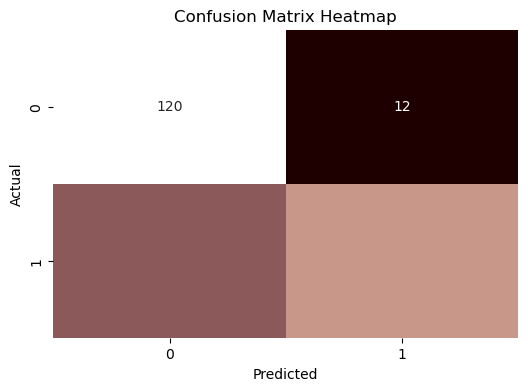

In [25]:
import seaborn as sns

# 🔹 Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap="pink", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()



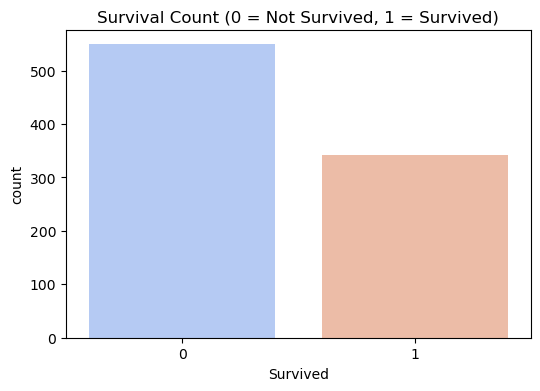

In [26]:
# 1️⃣ Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="coolwarm")
plt.title("Survival Count (0 = Not Survived, 1 = Survived)")
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

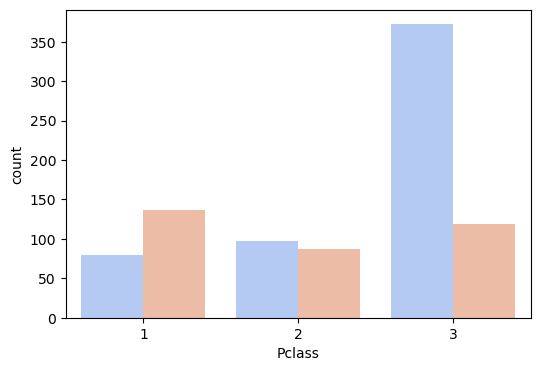

In [27]:
# Survival by Passenger Class with labels
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.xticks([0,1,2], ["First Class", "Second Class", "Third Class"])
plt.show()


In [ ]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], kde=True, color="red")
plt.title("Age Distribution of Passengers")
plt.show()

In [ ]:
# Age vs Survival
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Age", data=df, palette="coolwarm")
plt.title("Age vs Survival")
plt.show()


In [ ]:
# Fare Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Fare"], bins=30, kde=True, color="red")
plt.title("Fare Distribution of Passengers")
plt.show()